In [47]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from numpy.random import seed
seed(1)
tf.random.set_seed(1)

In [29]:
dataset=pd.read_csv("testset.csv")
dataset

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100985,20170424-06:00,Haze,17.0,0,0,NaN,25.0,NaN,1005.0,0,0,34.0,0,0,4.0,320.0,NW,NaN,NaN,11.1
100986,20170424-09:00,Haze,14.0,0,0,NaN,16.0,NaN,1003.0,0,0,38.0,0,0,4.0,320.0,NW,NaN,NaN,22.2
100987,20170424-12:00,Haze,12.0,0,0,NaN,14.0,NaN,1002.0,0,0,36.0,0,0,4.0,270.0,West,NaN,NaN,18.5
100988,20170424-15:00,Haze,15.0,0,0,NaN,27.0,NaN,1004.0,0,0,32.0,0,0,2.0,320.0,NW,NaN,NaN,3.7


In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow        100990 non-null  int64  
 11   _tempm       100317 non-null  float64
 12   _thunder     100990 non-null  int64  
 13   _tornado     100990 non-null  int64  
 14   _vism        96562 non-null   float64
 15   _wdird       86235 non-null   float64
 16   _wdire       86235 non-null   object 
 17   _wgustm      1072 non-null    float64
 18   _wi

In [31]:
dataset.describe()

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
count,100369.000000,100990.000000,100990.000000,29155.000000,100233.000000,0.0,1.007580e+05,100990.000000,100990.000000,100317.000000,100990.000000,100990.00000,96562.000000,86235.000000,1072.000000,579.000000,98632.000000
mean,15.741205,0.069690,0.000129,35.651710,57.909481,NaN,1.932331e+03,0.026260,0.000010,25.451269,0.009427,0.00002,2.402774,163.549974,37.671175,5.713817,7.678463
std,7.058587,0.254625,0.011345,5.015384,23.807771,NaN,3.183786e+05,0.159908,0.003147,8.482859,0.096633,0.00445,20.746028,120.002076,6.848666,1.203290,11.932157
min,-24.000000,0.000000,0.000000,26.800000,4.000000,NaN,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,NaN,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,15.000000,0.000000,0.000000,35.100000,59.000000,NaN,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000,2.000000,160.000000,37.000000,6.100000,7.400000
75%,22.000000,0.000000,0.000000,39.200000,78.000000,NaN,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000,3.000000,270.000000,40.700000,6.800000,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,NaN,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.00000,6436.000000,960.000000,92.600000,7.300000,1514.900000


In [32]:
dataset.columns=dataset.columns.str.replace("_","")
dataset.columns=dataset.columns.str.replace(" ","")
dataset.columns

Index(['datetimeutc', 'conds', 'dewptm', 'fog', 'hail', 'heatindexm', 'hum',
       'precipm', 'pressurem', 'rain', 'snow', 'tempm', 'thunder', 'tornado',
       'vism', 'wdird', 'wdire', 'wgustm', 'windchillm', 'wspdm'],
      dtype='object')

In [33]:
# dataset.drop("conds",inplace=True,axis=1)
# dataset.drop(,inplace=True,axis=1)
# dataset.drop(,inplace=True,axis=1)
# dataset.drop(inplace=True,axis=1)
# dataset.drop(,inplace=True,axis=1)
# dataset.drop(inplace=True,axis=1)
# dataset.drop(inplace=True,axis=1)
# dataset.drop(,inplace=True,axis=1)
dataset.drop(columns=["conds","dewptm","fog","hail","heatindexm","precipm","rain","snow","thunder","tornado","vism","wdird","wdire","wgustm","windchillm"],inplace=True,axis=1)
dataset

,datetimeutc,hum,pressurem,tempm,wspdm
0,19961101-11:00,27.0,1010.0,30.0,7.4
1,19961101-12:00,32.0,-9999.0,28.0,NaN
2,19961101-13:00,44.0,-9999.0,24.0,NaN
3,19961101-14:00,41.0,1010.0,24.0,NaN
4,19961101-16:00,47.0,1011.0,23.0,0.0
...,...,...,...,...,...
100985,20170424-06:00,25.0,1005.0,34.0,11.1
100986,20170424-09:00,16.0,1003.0,38.0,22.2
100987,20170424-12:00,14.0,1002.0,36.0,18.5
100988,20170424-15:00,27.0,1004.0,32.0,3.7


In [34]:
dataset.replace(0,np.nan)
dataset.isnull().sum()

datetimeutc       0
hum             757
pressurem       232
tempm           673
wspdm          2358
dtype: int64

In [35]:
hum_median=dataset["hum"].median()
dataset["hum"].fillna(hum_median,inplace=True)
pressurem_median=dataset["pressurem"].median()
dataset["pressurem"].fillna(pressurem_median,inplace=True)
wspdm_median=dataset["wspdm"].median()
dataset["wspdm"].fillna(wspdm_median,inplace=True)
tempm_median=dataset["tempm"].median()
dataset["tempm"].fillna(tempm_median,inplace=True)

In [1]:
dataset.isnull().sum()

NameError: name 'dataset' is not defined

In [37]:
timeseries_data=dataset.copy()

In [38]:
timeseries_data["datetimeutc"].dtype

dtype('O')

In [39]:
timeseries_data["datetimeutc"]=pd.to_datetime(timeseries_data["datetimeutc"])

In [40]:
timeseries_data.set_index("datetimeutc",inplace=True)

In [41]:
timeseries_data

,hum,pressurem,tempm,wspdm
datetimeutc,,,,
1996-11-01 11:00:00,27.0,1010.0,30.0,7.4
1996-11-01 12:00:00,32.0,-9999.0,28.0,7.4
1996-11-01 13:00:00,44.0,-9999.0,24.0,7.4
1996-11-01 14:00:00,41.0,1010.0,24.0,7.4
1996-11-01 16:00:00,47.0,1011.0,23.0,0.0
...,...,...,...,...
2017-04-24 06:00:00,25.0,1005.0,34.0,11.1
2017-04-24 09:00:00,16.0,1003.0,38.0,22.2
2017-04-24 12:00:00,14.0,1002.0,36.0,18.5


In [42]:
data_daily=timeseries_data.resample("D").mean()
data_daily

,hum,pressurem,tempm,wspdm
datetimeutc,,,,
1996-11-01,52.916667,-2659.666667,22.333333,6.166667
1996-11-02,48.625000,1009.833333,22.916667,7.950000
1996-11-03,55.958333,1010.500000,21.791667,5.020833
1996-11-04,48.055556,1011.333333,22.722222,2.266667
1996-11-05,29.400000,1011.800000,27.800000,10.020000
...,...,...,...,...
2017-04-20,27.500000,998.625000,34.500000,5.562500
2017-04-21,39.375000,999.875000,34.250000,6.962500
2017-04-22,40.900000,1001.600000,32.900000,8.890000


In [43]:
data_daily.isnull().sum()

hum          141
pressurem    141
tempm        141
wspdm        141
dtype: int64

In [44]:
data_daily.fillna(data_daily.mean(),inplace=True)
data_daily.isnull().sum()

hum          0
pressurem    0
tempm        0
wspdm        0
dtype: int64

In [45]:
data_daily_temp=pd.DataFrame(list(data_daily["tempm"]),columns=["temp"])

In [46]:
data_daily_temp

,temp
0,22.333333
1,22.916667
2,21.791667
3,22.722222
4,27.800000
...,...
7475,34.500000
7476,34.250000
7477,32.900000
7478,32.875000


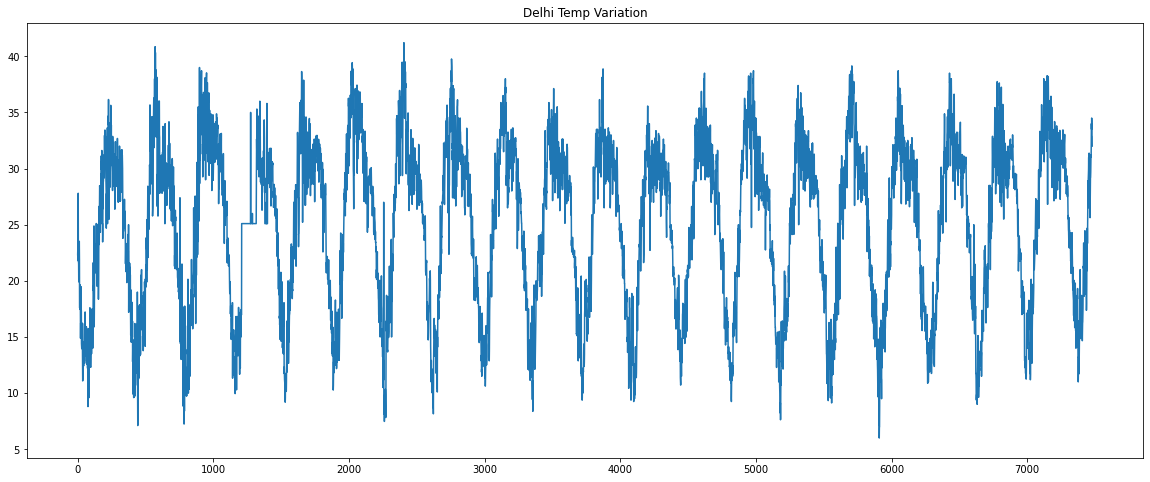

In [50]:
plt.figure(figsize=(20,8))
plt.plot(data_daily_temp)
plt.title("Delhi Temp Variation")
plt.show()

In [53]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
scaler=MinMaxScaler(feature_range=(-1,1))
data_daily_temp=scaler.fit_transform(data_daily_temp)

In [54]:
print(data_daily_temp)
print(data_daily_temp.shape)

[[-0.07224714]
 [-0.0391131 ]
 [-0.10301445]
 ...
 [ 0.52795217]
 [ 0.52653214]
 [ 0.47683109]]
(7480, 1)


In [55]:
steps=30
X_part=[]
Y_part=[]
for i in range(len(data_daily_temp)-steps):
  X_part.append(data_daily_temp[i:i+steps])
  Y_part.append(data_daily_temp[i+steps])

X_part=np.array(X_part)
Y_part=np.array(Y_part)

print(X_part.shape)
print(Y_part.shape)

(7450, 30, 1)
(7450, 1)


In [56]:
train_X=X_part[:7300,::]
test_X=X_part[7300:,::]

train_Y=Y_part[:7300]
test_Y=Y_part[7300:]

In [58]:
from tensorflow.keras import models, layers, utils, optimizers, callbacks
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [59]:
model1=models.Sequential()
model1.add(layers.Conv1D(filters=128, kernel_size=2, activation="relu", input_shape=(30,1)))
model1.add(layers.Conv1D(filters=128, kernel_size=2, activation="relu"))
model1.add(layers.MaxPooling1D(pool_size=2))
model1.add(layers.Conv1D(filters=256, kernel_size=2, activation="relu"))
model1.add(layers.Flatten())
model1.add(layers.RepeatVector(30)) #same as input (30,1)
model1.add(layers.LSTM(units=100, return_sequences=True, activation="relu"))
model1.add(layers.Dropout(0.2))
model1.add(layers.LSTM(units=100, return_sequences=True, activation="relu"))
model1.add(layers.Dropout(0.2))
model1.add(layers.Bidirectional(layers.LSTM(units=128, activation="relu")))
model1.add(layers.Dense(100, activation="relu"))
model1.add(layers.Dense(1))

In [60]:
model1.compile(loss="mae",optimizer=optimizers.Adam(lr=0.0001))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 128)           384       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 128)           32896     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 14, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 13, 256)           65792     
_________________________________________________________________
flatten (Flatten)            (None, 3328)              0         
_________________________________________________________________
repeat_vector (RepeatVector) (None, 30, 3328)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 30, 100)           1

In [61]:
Earlystp=callbacks.EarlyStopping(monitor="loss", mode="min", patience=5, restore_best_weights=True)
Savemod=callbacks.ModelCheckpoint(filepath="model1_ts.h5", monitor="loss", save_best_only=True)

In [ ]:
history=model1.fit(train_X, train_Y, epochs=200, verbose=0, callbacks=[Earlystp, Savemod])